In [1]:
#import relevant libraries
#Load modules
import os
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
#import dabest
from struct import *
import osar
import scipy as sp
import re
import dabest
#import dabest_nbdev
# import dabest_jck
import warnings
from datetime import datetime
import scikits.bootstrap as skb
from osar.plot_helpers.plot_helpers import r2_and_slope

date = datetime.today().strftime('%Y%m%d')
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")


## __COMPUTER TYPE__


In [2]:
#folderpath = "C:\\Users\\user\\"
folderpath = "C:\\Users\\lnico\\"
#folderpath = "C:\\Users\\Star\\"
#folderpath = "D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\"
pathinfile = "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\"
typeo = folderpath + pathinfile
genot = "Chrimson2"
typeob = typeo + genot + "\\"

## __RUN ONLY IF YOU HAVE NEW DATA__


In [32]:
#nicole's data (only run if no comp set)
root = typeob
startdir = os.listdir(root)
baseDirectory=[]
basegenotype=[]
for n,sd in enumerate(startdir):
    dir1 = os.path.join(root, os.listdir(root)[n])
    baseDirectory.append(dir1)
    basegenotype.append(re.search(r'^.*?(?= x )', (os.path.split(dir1)[1])).group(0))
    #basegenotype.append(re.search(r'^.*?(?=-Gal4)', (os.path.split(dir1)[1])).group(0))
        
        
dfs=[]
for loc,name in zip(baseDirectory,basegenotype):
    dfs.append(osar.osar(loc,driver = name).results)

Creating borders for each fly...
Done.

Processing CSV 52 of 52
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 71 of 71
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 44 of 44
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 65 of 65
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 67 of 67
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 52 of 52
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 40 of 40
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 51 of 51
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 56 of 56
Summarising results for all flies...
All done.
C

In [33]:
df=pd.concat(dfs)
filepath = typeo + genot + "compilation_full.csv"
df.to_csv(filepath)
#df.to_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACRcompilation_full.csv')

## __RUN THIS IF OLD DATA SET__

In [3]:
filepath = typeo + genot + "compilation_full.csv"
df2= pd.read_csv(filepath)

basegenotype = df2['driver'].unique()

#dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
dfi=df2[(df2['light_intensity']=='Full')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

In [5]:
# basegenotype = ['SS46348', 'SS67662', 'SS75200', 'SS77450', 'SS81353', 'SS81521', 'SS95118','VT999036']

In [4]:
def chartplottingdabest(dfi, basegenotype, parameter):
    
    dfr1 = pd.DataFrame()
    for names in basegenotype:
        dfrr = pd.DataFrame()
        filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
        filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

        dfrr[names + " Cntrl" ] = filter2[parameter]
        dfrr[names] = filter1[parameter]
        dfr1 = pd.concat([dfr1, dfrr], axis = 1)
        
    l = dfr1.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    
    test = dabest.load(dfr1, idx=titlelst, ci=90)    
    tab = pd.concat([test.mean_diff.results['test'], test.mean_diff.results['difference']], axis = 1)
    
    arrangedsorting = tab.sort_values(by=['difference'], ascending = True).reset_index(drop=True)

    newlist = []
    for n in arrangedsorting['test']:
        newlist.append((n +" Cntrl", n))

    return dfr1, arrangedsorting['test'], newlist

In [5]:
dfpi, sortedlist, dabestlist = chartplottingdabest(dfi, basegenotype, 'pi_smoothed_Pattern 01')
dfspeed, notsortedlist, notdabestlist = chartplottingdabest(dfi, basegenotype, 'log2_speed_ratio_Pattern 01')

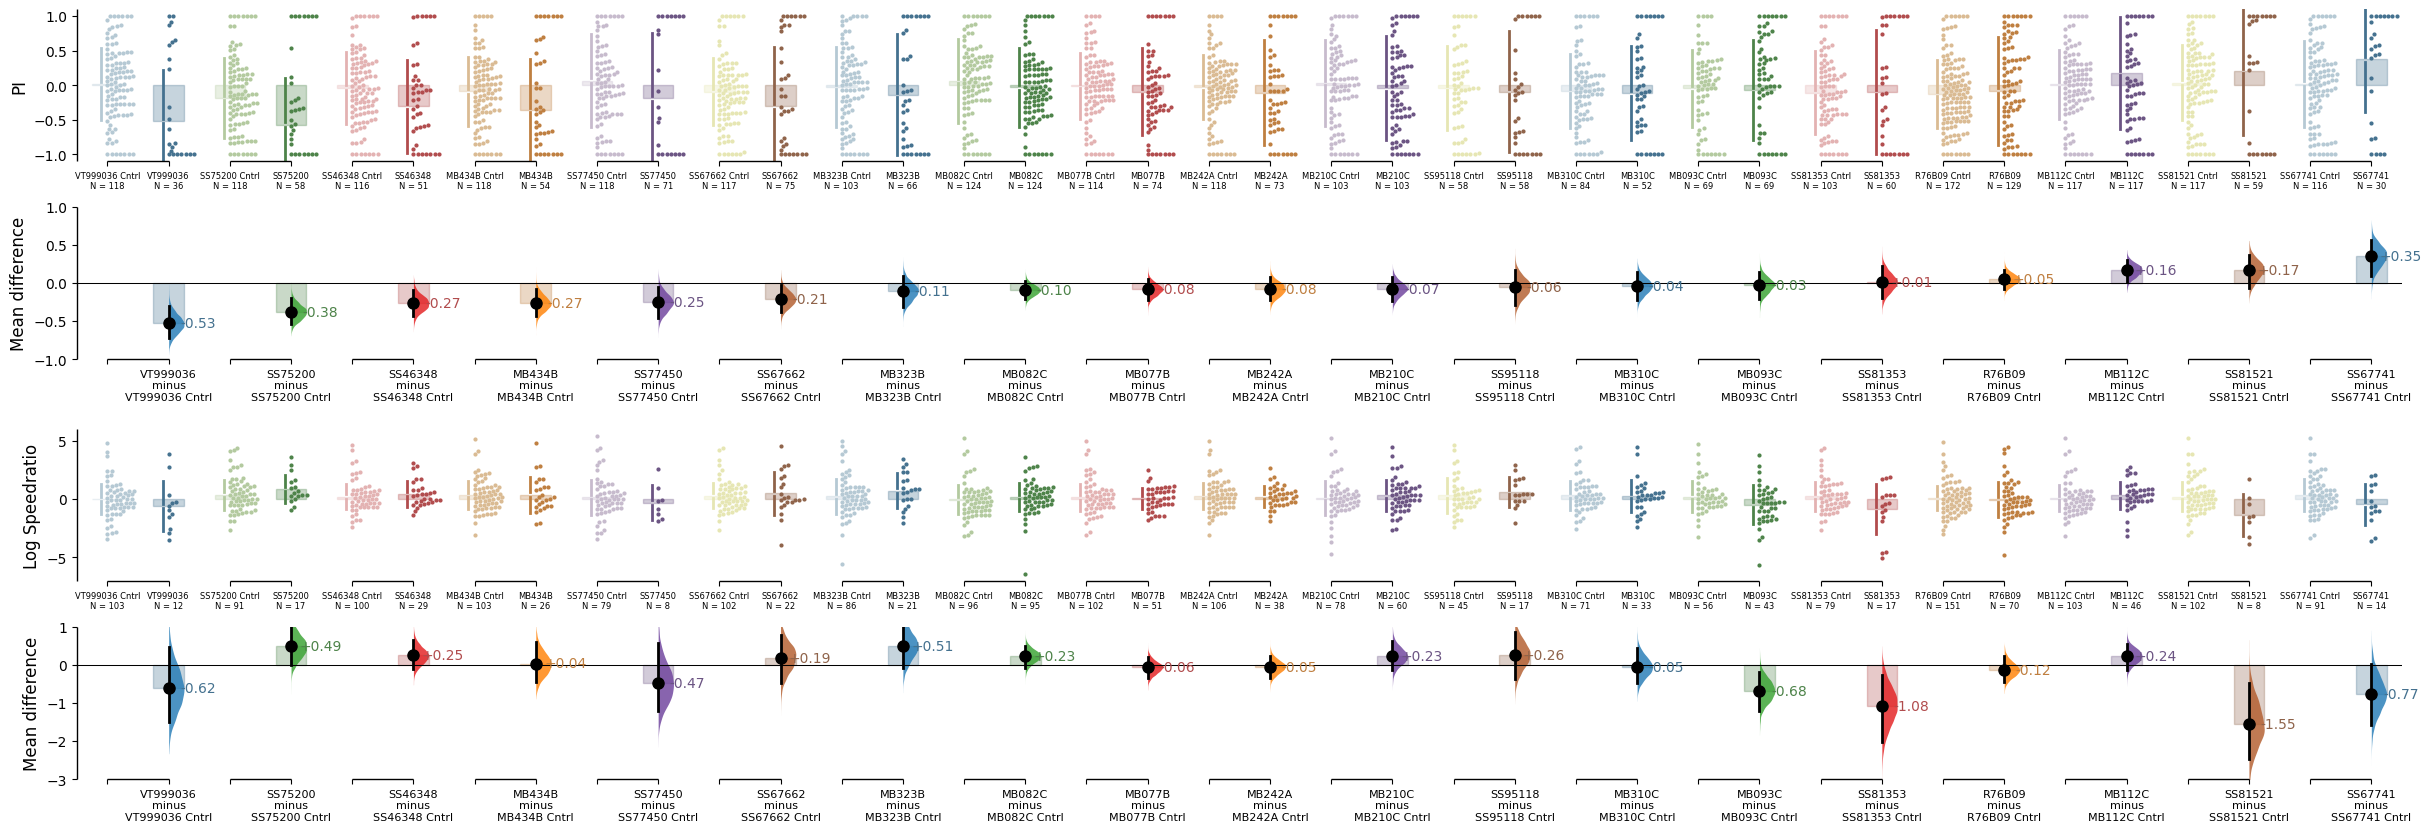

In [6]:
f, axx = plt.subplots(nrows=2, ncols=1,
                    figsize=(30
                             ,10) # ensure proper width-wise spacing.
                   )

piplot = dabest.load(dfpi, idx=dabestlist, ci=90)
piplot.mean_diff.plot(fontsize_rawxlabel=6, fontsize_contrastxlabel=8, float_contrast=False, raw_marker_size=1, es_marker_size=8, 
                      custom_palette="Paired", swarm_label="PI", contrast_ylim=(-1,1), ax=axx.flat[0]);

spplot = dabest.load(dfspeed, idx=dabestlist, ci=90)
spplot.mean_diff.plot(fontsize_rawxlabel=6, fontsize_contrastxlabel=8, float_contrast=False, raw_marker_size=1, es_marker_size=8, 
                      custom_palette="Paired", swarm_label="Log Speedratio", contrast_ylim=(-3,1), ax=axx.flat[1]);

#sns.set(font_scale=0.5,  style='ticks')

In [7]:
filename = folderpath + "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\2024images\\" + date + 'compilation_' + genot + '_totalplots_Full_light'
f.savefig(filename + '.svg', bbox_inches="tight", dpi=600)

## Addition of singular plots

In [15]:
filepath = typeo + genot + "compilation_full.csv"
df2= pd.read_csv(filepath)

basegenotype = df2['driver'].unique()

#dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
dfi=df2[(df2['light_intensity']=='Full')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

basegenotype

array(['MB077B', 'MB082C', 'MB093C', 'MB112C', 'MB210C', 'MB242A',
       'MB310C', 'MB323B', 'MB434B', 'R76B09', 'SS46348', 'SS67662',
       'SS67741', 'SS75200', 'SS77450', 'SS81353', 'SS81521', 'SS95118',
       'VT999036'], dtype=object)

In [9]:
def singleplottingdabest(dfi, names, parameter):
    import dabest_nbdev
    dfrr = pd.DataFrame()
    filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
    filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

    dfrr[names + " Cntrl" ] = filter2[parameter]
    dfrr[names] = filter1[parameter]
    #dfr1 = pd.concat([dfr1, dfrr], axis = 1)
        
    l = dfrr.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    test = dabest.load(dfrr, idx=titlelst, ci=90)    
    
    return test

In [10]:
basegenotype = ['VT999036']

In [18]:
filename

'C:\\Users\\lnico\\ACC Lab\\Nicole Lee\\Data Compilation\\2024images\\MB077B x Chrimson2_OSAR_Full_light'

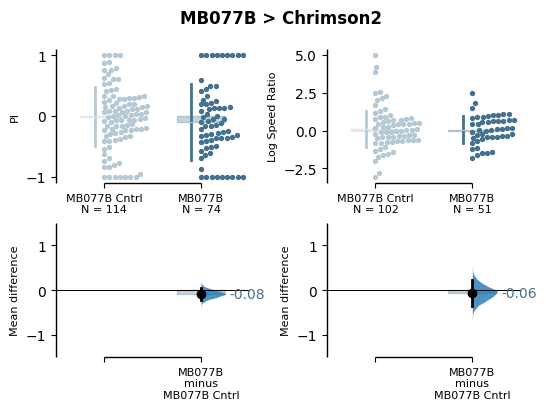

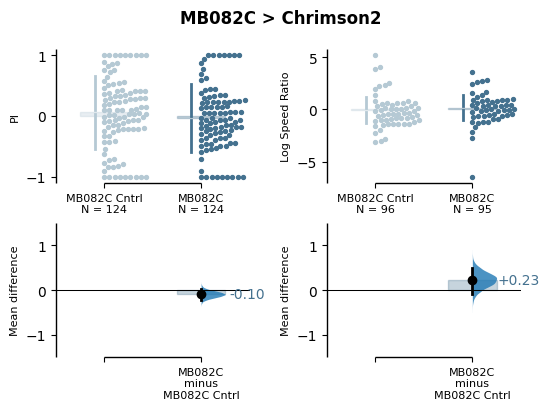

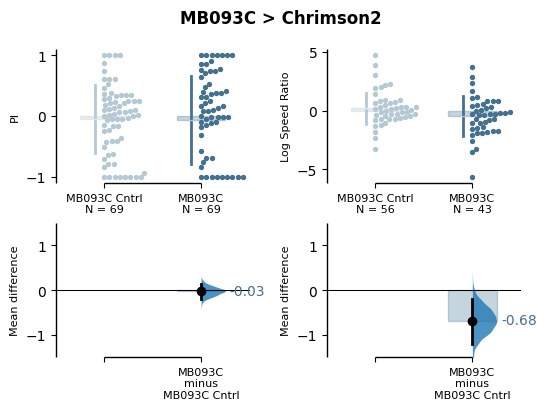

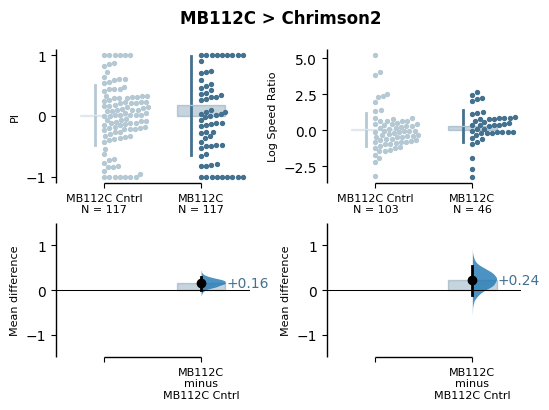

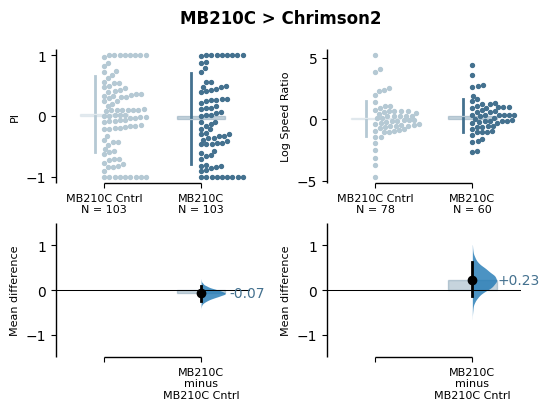

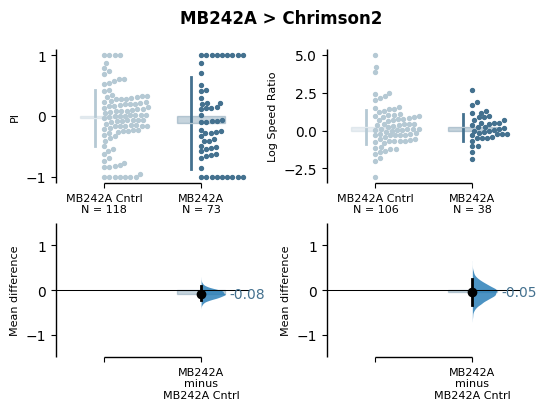

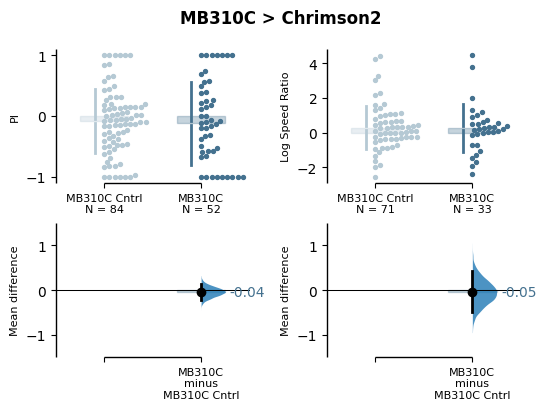

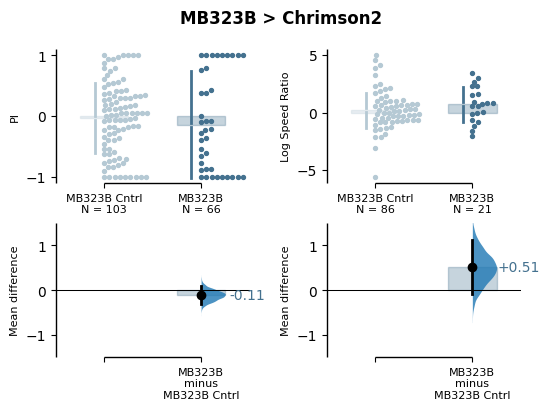

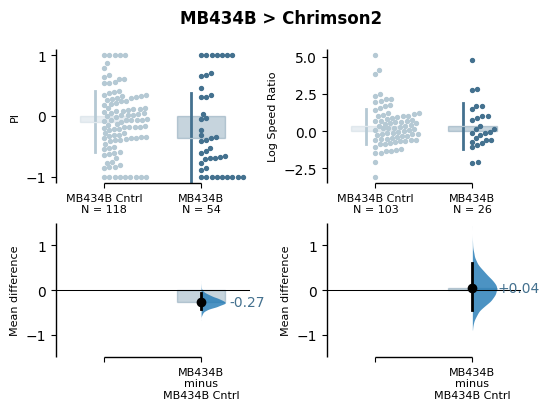

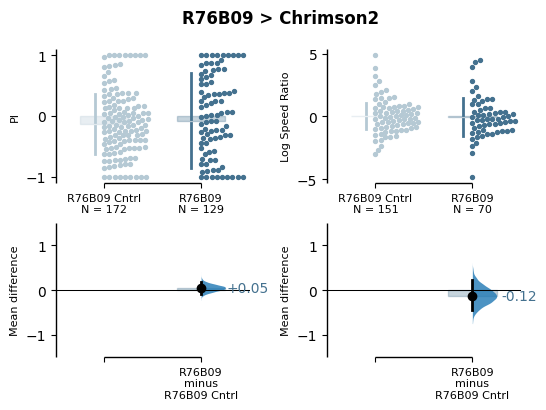

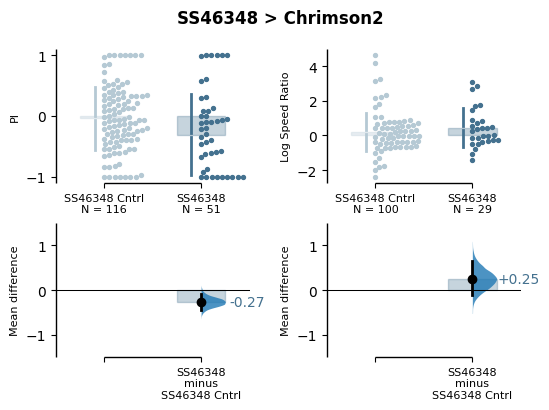

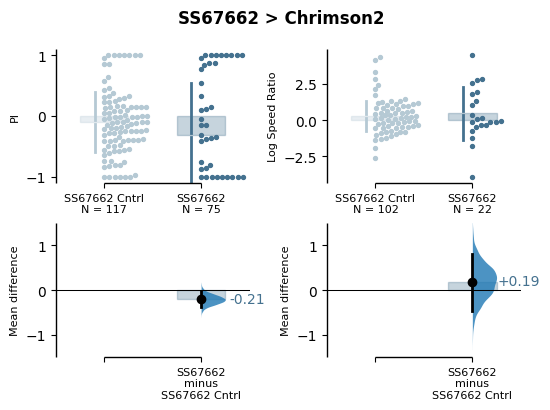

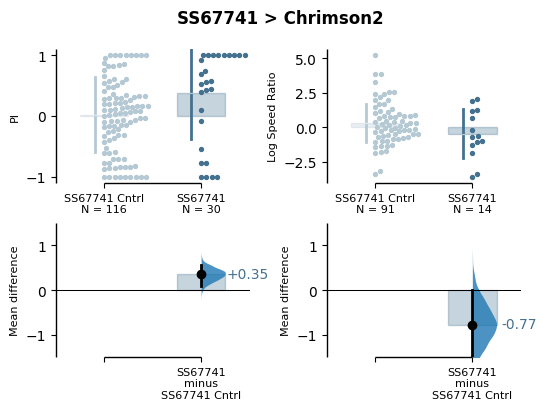

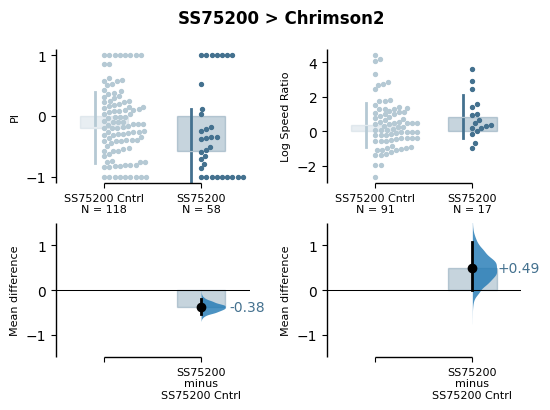

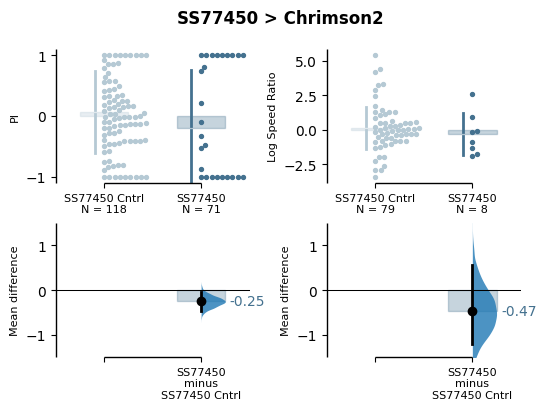

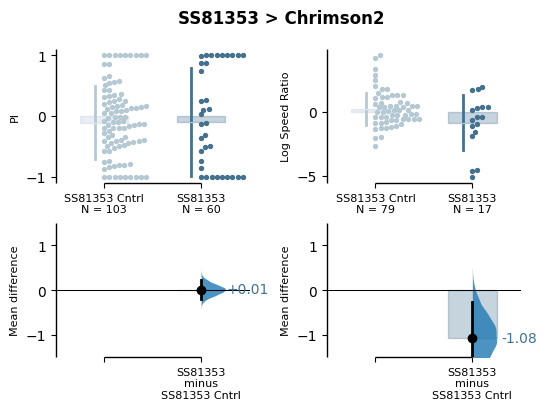

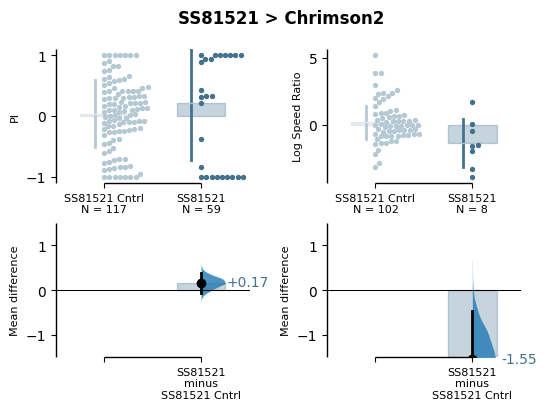

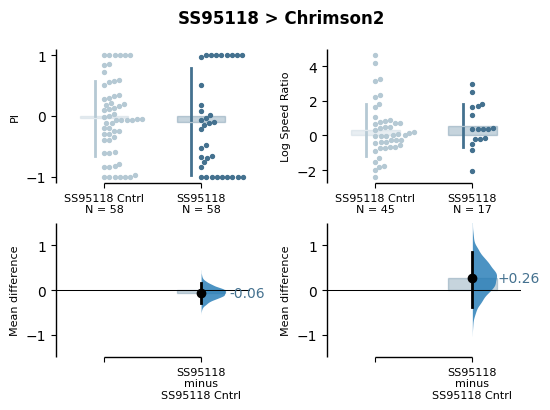

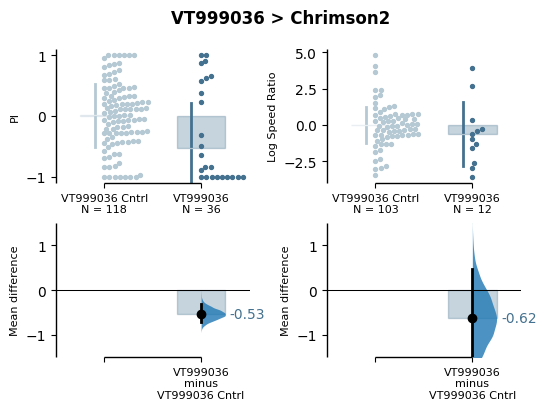

In [19]:
for n in basegenotype:
   
   figure2, axx = plt.subplots(nrows=1, ncols=2,
                    figsize=(6
                             ,4), gridspec_kw={'wspace': 0.4}
                                # ensure proper width-wise spacing.
                   )

   singleplottingdabest(dfi, n, "pi_smoothed_Pattern 01").mean_diff.plot(float_contrast=False, fontsize_rawylabel=8, fontsize_rawxlabel=8, 
        fontsize_contrastxlabel=8, fontsize_contrastylabel=8, raw_marker_size=2, es_marker_size=6, 
                         custom_palette="Paired", swarm_label="PI", contrast_ylim=(-1.5,1.5), ax=axx.flat[0]);

   singleplottingdabest(dfi, n, "log2_speed_ratio_Pattern 01").mean_diff.plot(float_contrast=False, fontsize_rawylabel=8,fontsize_rawxlabel=8, 
        fontsize_contrastxlabel=8, fontsize_contrastylabel=8, raw_marker_size=2, es_marker_size=6, 
                        custom_palette="Paired", swarm_label="Log Speed Ratio", contrast_ylim=(-1.5,1.5), ax=axx.flat[1]);

   pivalue = round(singleplottingdabest(dfi, n, "pi_smoothed_Pattern 01").mean_diff.results['difference'],2).values[0]
   srvalue = round(singleplottingdabest(dfi, n, "log2_speed_ratio_Pattern 01").mean_diff.results['difference'],2).values[0]

   figure2.tight_layout()
   figure2.suptitle( n + " > " + genot, fontweight='bold', size = 12, y=0.98)
   # axx[0].text(1.75, 1.2,  r"$\bf{PI:}$" + str(pivalue), fontsize = 10, transform=axx[0].transAxes)
   # axx[1].text(0.8, 1.2,  r"$\bf{SR:}$" + str(srvalue) , fontsize = 10, transform=axx[1].transAxes)
   
   #filesaving
   filename = folderpath + "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\2024images\\" +  n + " x " + genot + '_OSAR_Full_light'
   figure2.savefig(filename + '.svg', bbox_inches="tight", dpi=600)



# __Regression plot__

In [74]:
def meandiffchart(dfi, basegenotype, parameter):
    
    dfr1 = pd.DataFrame()
    for names in basegenotype:
        dfrr = pd.DataFrame()
        filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
        filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

        dfrr[names + " Cntrl" ] = filter2[parameter]
        dfrr[names] = filter1[parameter]
        dfr1 = pd.concat([dfr1, dfrr], axis = 1)
        
    l = dfr1.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    
    test = dabest.load(dfr1, idx=titlelst, ci=90)    
    tab = pd.concat([test.mean_diff.results['test'], round(test.mean_diff.results['difference'],3)], axis = 1)
    tab.rename(columns = {'test':'MBON', 'difference':parameter}, inplace = True)

    return tab

In [75]:
valencemd = meandiffchart(dfi, sortedlist, 'pi_smoothed_Pattern 01')
srmd = meandiffchart(dfi, sortedlist, 'log2_speed_ratio_Pattern 01')

totalmd = pd.DataFrame()
totalmd = pd.concat([valencemd,srmd.iloc[:,1]], axis = 1)
totalmd.rename(columns = {'MBON': 'MBON > ' + genot, 'pi_smoothed_Pattern 01':'PI MeanDiff', 'log2_speed_ratio_Pattern 01':'Speed Ratio MeanDiff'}, inplace = True)

# totalmd.MBON = totalmd.MBON.astype("category")
# totalmd.MBON = totalmd.MBON.cat.set_categories(arrangedsorting['test'])

# totalmd = totalmd.sort_values(["MBON"]).reset_index(drop=True)

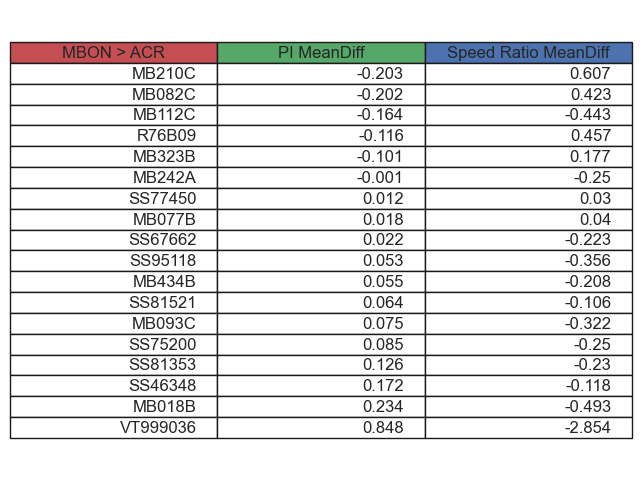

In [76]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(np.random.randn(5, 4), columns=list('ABCD'))

tablele = ax.table(cellText= totalmd.values, colLabels=totalmd.columns, colColours = 'rgba(128,128,128,0.3)', loc='center')

fig.tight_layout()
#tablele.scale(2, 2)
tablele.set_fontsize(16)

plt.show()

fig.savefig("D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\2024images\\" + date + "tableofOSAR" + genot + "values.png")

In [53]:
reglst=[]

for name in totalmd['MBON'].tolist():

    dfo=dfi[dfi['MBON']==name]
    x = dfo['log2_speed_ratio_Pattern 01'].to_numpy()
    y = dfo['pi_smoothed_Pattern 01'].to_numpy()

    finiteMask = np.isfinite([x, y]).all(axis=0)

    corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
    r2 = np.round(corr.rvalue**2, 3)
    
    reglst.append(r2)

reg = pd.DataFrame()
reg['MBON']=totalmd['MBON'].tolist()
reg["Regression value"] = reglst


totalmdt = pd.DataFrame()
totalmdt = pd.concat([totalmd, reg["Regression value"]], axis=1)
totalmdt.set_index('MBON', inplace = True)

## Single Lin regression

c:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 0, 'Absolute PI Mean Diff')

<Figure size 2000x2000 with 0 Axes>

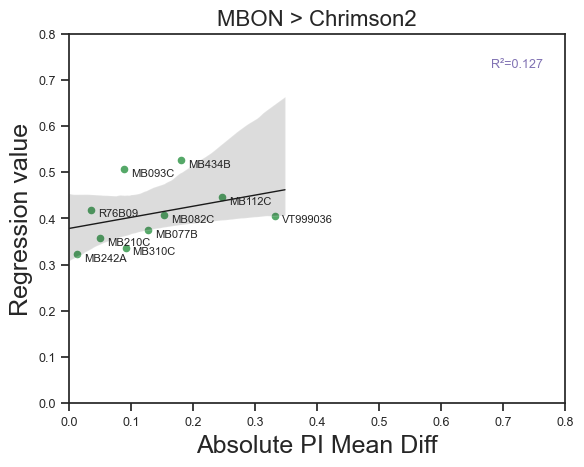

In [28]:
totalmdtabs = totalmdt.copy().reset_index(drop=False)
totalmdtabs['PI MeanDiff'] = abs(totalmdtabs['PI MeanDiff'])

plt_1 = plt.figure(figsize=(20, 20), dpi = 100)

plt_1= totalmdtabs.plot(kind = 'scatter', x= 'PI MeanDiff', y = 'Regression value', color = "g");

sns.regplot(x = totalmdtabs['PI MeanDiff'],
                y = totalmdtabs['Regression value'],
                scatter=False,
                line_kws={'lw':1}, 
                color="k",
                truncate=False)

x = totalmdtabs['PI MeanDiff'].to_numpy()
y = totalmdtabs['Regression value'].to_numpy()

finiteMask = np.isfinite([x, y]).all(axis=0)

corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
lowers, uppers = skb.ci((x[finiteMask], y[finiteMask]), 
                        statfunction=r2_and_slope, 
                        n_samples=3000)

r2 = np.round(corr.rvalue**2, 3)
r2_lower = np.round(lowers[0], 3)
r2_upper = np.round(uppers[0], 3)

plt_1.annotate('R\u00b2='+str("{:.3f}".format(r2)), 
                        xy=(0.85, 0.90),  # xy coords
                        xycoords='axes fraction',
                        ha='left', va='bottom', color = "m",
                        fontsize=9)


for idx, row in totalmdtabs.iterrows():
    plt_1.annotate(row['MBON' ], (row['PI MeanDiff'], row['Regression value']), xytext=(5,-5),
                textcoords='offset points', family='sans-serif', fontsize=8)
plt_1.set_xlim(0, 0.8)
plt_1.set_ylim(0, 0.8)
plt_1.tick_params(axis='x', labelsize=9)
plt_1.tick_params(axis='y', labelsize=9)
plt_1.set_title("MBON > " + genot, fontsize = 16)
plt_1.set_xlabel('Absolute PI Mean Diff')

## Total regression plot

In [29]:
import seaborn as sns

#dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full') & (df2['status'] == 'Offspring')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

nama = basegenotype

dfx = pd.DataFrame()

for each in nama:
    dfy = dfi[(dfi['MBON'] == each)]
    dfx = pd.concat([dfx, dfy])
    
osar_data = dfx

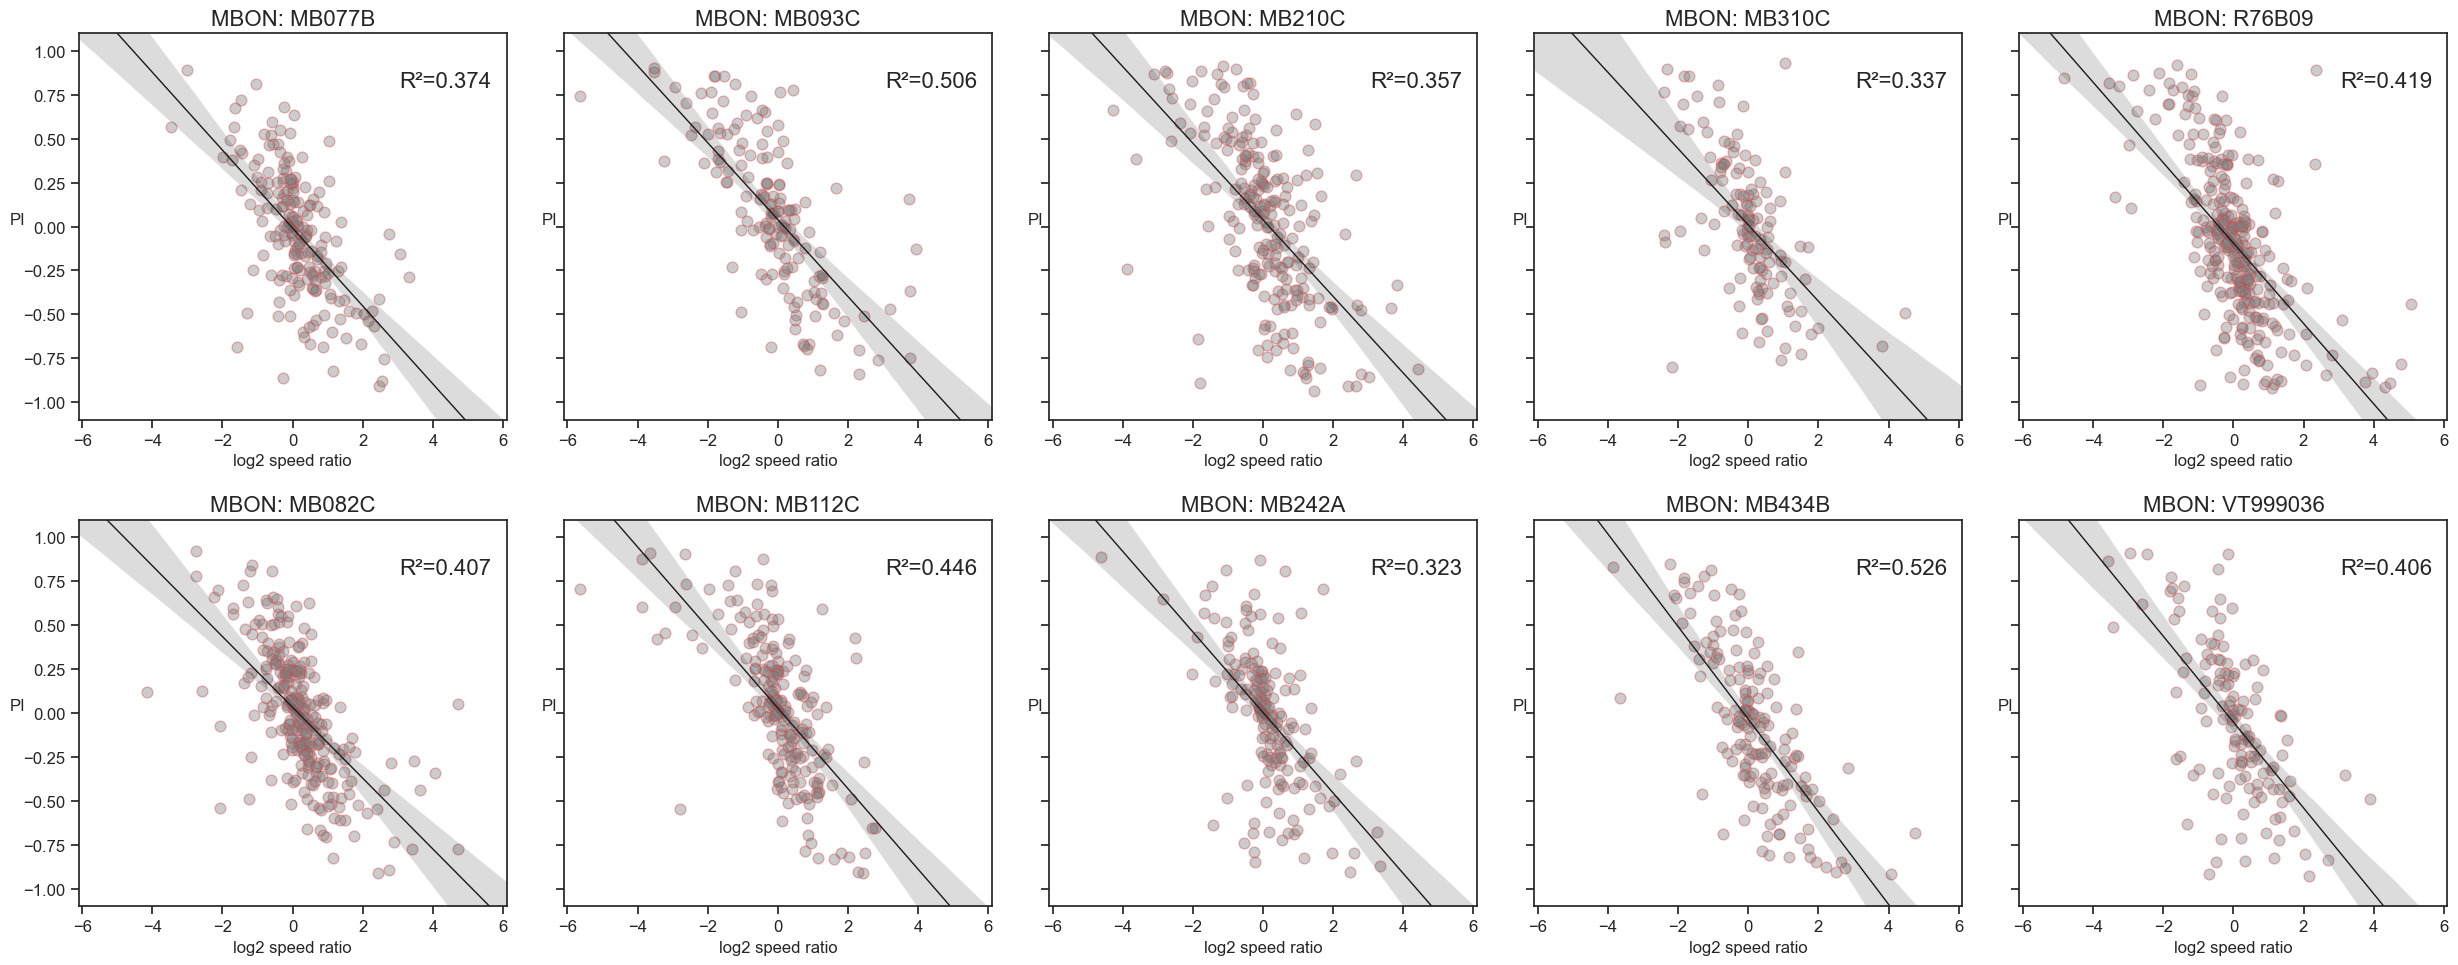

In [30]:
f, ax = plt.subplots(nrows=2, ncols=5,figsize=(25,10), sharey = True)  #ACR

for name, row, col in zip(basegenotype, 5*[0,1], 2*[0]+2*[1]+2*[2]+2*[3]+2*[4]+2*[5]): #ACR

    df=osar_data[osar_data['MBON']==name]

    ax[row][col].set_ylim(-1.1,1.1)  
    ax[row][col].set_xlim(-6.1,6.1) 
    ax[row][col].tick_params(axis='x', labelsize= 12)
    ax[row][col].tick_params(axis='y', labelsize= 12)

    ax[row][col].scatter(df['log2_speed_ratio_Pattern 01'], 
            df['pi_smoothed_Pattern 01'],
            color='grey',
            edgecolors="r",
            alpha=0.4, 
            s=60)

                    
    sns.regplot(x = df['log2_speed_ratio_Pattern 01'],
                    y = df['pi_smoothed_Pattern 01'],
                    scatter=False,
                    line_kws={'lw':1}, 
                    color="k",
                    ax=ax[row][col],
                    truncate=False)

    x = df['log2_speed_ratio_Pattern 01'].to_numpy()
    y = df['pi_smoothed_Pattern 01'].to_numpy()

    finiteMask = np.isfinite([x, y]).all(axis=0)

    corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
    lowers, uppers = skb.ci((x[finiteMask], y[finiteMask]), 
                            statfunction=r2_and_slope, 
                            n_samples=3000)

    r2 = np.round(corr.rvalue**2, 3)
    r2_lower = np.round(lowers[0], 3)
    r2_upper = np.round(uppers[0], 3)

    ax[row][col].annotate('R\u00b2='+str("{:.3f}".format(r2)), 
                            xy=(0.75, 0.85),  # xy coords
                            xycoords='axes fraction',
                            ha='left', va='bottom',
                            fontsize=16)


    ax[row][col].set_ylabel('PI', rotation = 0, fontsize=12)
    ax[row][col].set_xlabel('log2 speed ratio', fontsize=12)
    ax[row][col].set_title("MBON: "+ name, fontsize = 16)


f.tight_layout()

#f.savefig("D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Figure\\regressionhalffull" + date + ".png")